# 0. Simulate phone dataset (*)

We want to simulate data (x,y) to represent cost for phone subscriptions, with:


 - x : called minutes per month

 - y : SEK per month
  
a) Use numpy.random.normal() to simulate a dataset with the following requirements:(*)

- Set a seed to 42 (for reproducibility and reference)
- simulate 400 x-values from the r.v. X∼N(100,100)
- take absolute value of these x-values
- simulate noise 400 noise values from r.v. ϵ∼N(0,50)
- Let y=2x+25+ϵ
- plot the data set



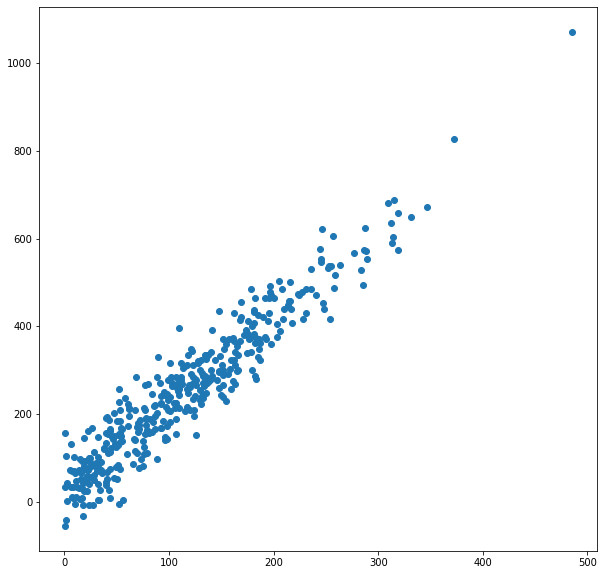

In [73]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)

X =np.abs(np.random.normal(100, 100, (400,1)))
B = np.random.normal(0,50,(400,1))

Y = 2*X + 25 + B 

plt.figure(figsize=(10, 10))
plt.scatter(X, Y)


b) Now we want to remove some outliers according to this assumption: (*)

- no one talks more than 300 min using this type of subscription
- no ones costs can be negative
- plot the new dataset
- also plot ground truth using the true parameters β0=25,β1=2 

In [74]:
MAX = len(Y)
i = 0 
while i<MAX :
    if Y[i] < 0 or X[i] >300 :
        Y = np.delete(Y,i)
        X = np.delete(X,i)
        MAX -=1 
    else :
        i+=1 

print(len(Y))


381


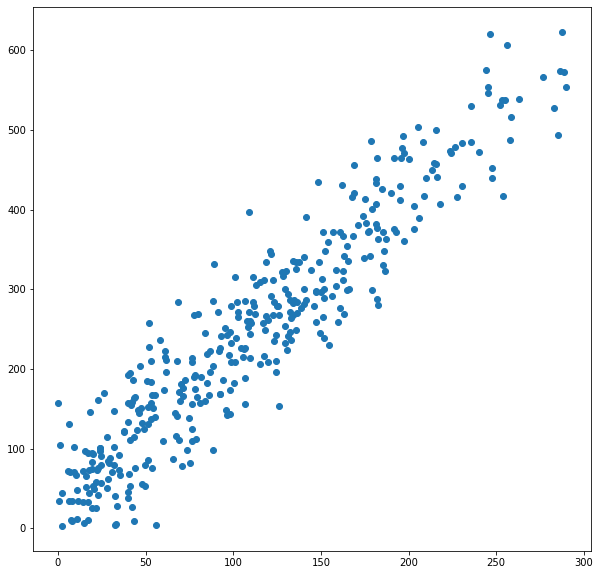

In [75]:


plt.figure(figsize=(10, 10))
plt.scatter(X, Y)

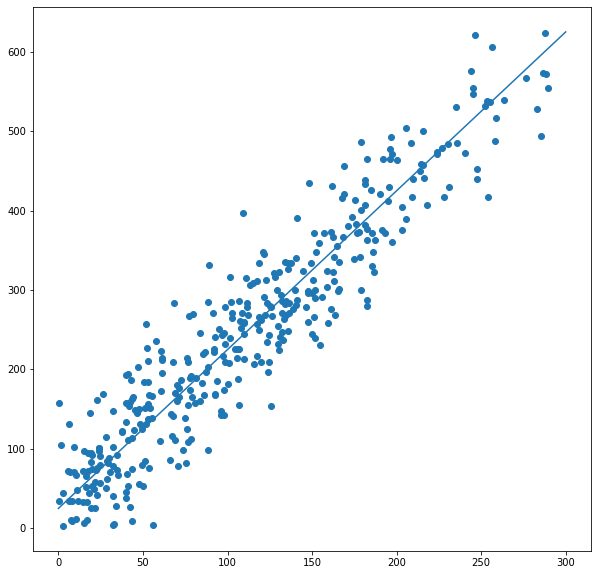

In [76]:
x_line = np.linspace(0,300)
y_line = 2 * x_line + 25

plt.figure(figsize=(10,10))

plt.scatter(X,Y)
plt.plot(x_line,y_line)

c) Insert the values into a DataFrame (*)

In [77]:
import pandas as pd


df = pd.DataFrame({"Minuter":X,"Kostnad":Y})


df.head()

,Minuter,Kostnad
0,149.671415,244.621448
1,86.173570,167.378389
2,164.768854,354.799893
3,252.302986,531.955001
4,76.584663,155.666051


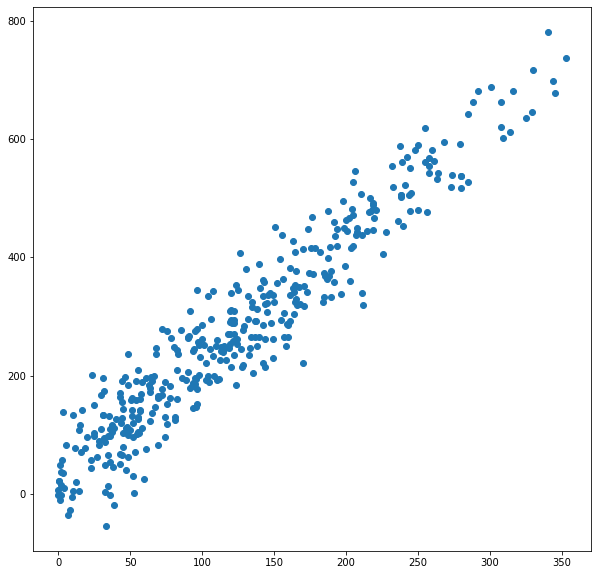

In [78]:

np.random

X =np.abs(np.random.normal(100, 100, (400,1)))
B = np.random.normal(0,50,(400,1))

Y = 2*X + 25 + B 

plt.figure(figsize=(10, 10))
plt.scatter(X, Y)

# 1. Train|test split (*)

Before moving on with linear regression we shall first perform a train-test-split.

a) Create a train-test-split function with the following call signature: (*)

def train_test_split(X: pd.DataFrame, y: pd.DataFrame, train_fraction=.7: float, random_state=42: int, replace=False: bool) -> tuple
that returns the tuple:

(X_train, X_test, y_train, y_test)
  


In [79]:
def train_test_split(X: pd.DataFrame, y: pd.DataFrame, train_fraction:float=0.7, random_state: int=42, replace: bool=False) -> tuple:
    limit_index = int(len(X) * train_fraction)

    X_train = X[:limit_index]
    y_train = y[:limit_index]
    X_test = X[limit_index:]
    y_test = y[limit_index:]

    return (X_train, X_test, y_train, y_test)

b) Now use this to split up your data into a training set and test set. Check manually that the split is performed correctly. (*)

Hint b) Check the length of each set, and check the indices of the sorted sets that they don't overlap and are not missing. Also check that they sum up to what you expect.

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X,Y)

print(len(X_train), len(X_test), len(y_train), len(y_test))
print(X_train[-1], X_test[0], y_train[-1], y_test[0])
print(f"{len(X_train)}+{len(X_test)} = {len(X)}")

280 120 280 120
[185.02217421] [65.13478656] [373.17143341] [191.38864101]
280+120 = 400


# 2. Simple linear regression with normal equation (*)

Use the normal equation for simple linear regression to solve for the coefficients $β^=(β0,β1)$

Note that you should only use the training data to fit the regression line, and not data from the test set. Plot the the regression line, together with ground truth and training data.


OLS result : (array([32.40923021]), array([1.96653853]))
Vectorial result : (32.4092302073079, 1.9665385271514224)


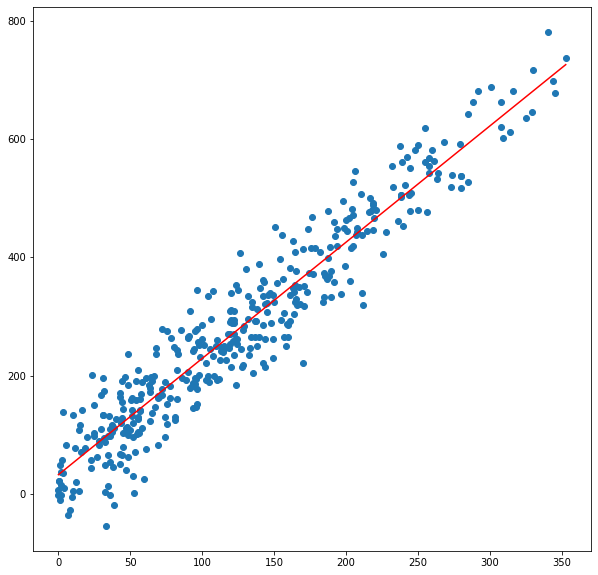

In [81]:
# OLS :
 
n = len(X_train)
sum_x = 0
sum_y = 0
sum_xy = 0
sum_x_square = 0
sum_y_square = 0

for i in range(n):
    sum_x +=  X_train[i]
    sum_y +=  y_train[i]
    sum_xy += X_train[i] * y_train[i]
    sum_x_square += X_train[i] ** 2
    sum_y_square += y_train[i] ** 2

beta_1 = (n*sum_xy - sum_x*sum_y)/(n*sum_x_square - sum_x**2)
beta_0 = (sum_y - beta_1*sum_x)/n

x = np.linspace(min(X),max(X))
y_x = beta_0 + x*beta_1

plt.figure(figsize=(10,10))
plt.scatter(X, Y)
plt.plot(x, y_x, color="red")


print(f"OLS result : {beta_0,beta_1}")

# vectorial way : 
from numpy.linalg import inv

X_train_matrix = np.asarray([np.ones(len(X_train)),X_train.flatten()]).T
b = inv(X_train_matrix.T@X_train_matrix)@X_train_matrix.T@y_train

beta_0,beta_1 = b.flatten()


print(f"Vectorial result : {beta_0,beta_1}")




# 3. Prediction and evaluation (*)

  a) Use your model to make prediction on testing data. Plot the prediction cost against X_test, and y_test against X_test. (*)

 

In [82]:
predicted_y = beta_0+X_test*beta_1

 b) Calculate MAE, MSE, RMSE (*)

In [83]:
m = len(X_test)

MAE = 1/m * np.sum(np.abs(y_test-predicted_y))
MSE = 1/m * np.sum((y_test-predicted_y)**2)
RMSE = np.sqrt(MSE)

MAE, MSE, RMSE

(43.817474130787545, 3002.8120276316886, 54.79791992066568)

# 4. Simulate more explanatory variables (*)


In [84]:
np.random.seed(42)

X1 = np.abs(np.random.normal(100,100,(10000,1)))
X2 = np.random.uniform(0,50,(10000,1))
X3 = np.random.normal(0,2,(10000,1))
epsilon = np.random.normal(0,50,(10000,1))

y = 25 + 2*X1 + 0.5*X2 + 50*X3 + epsilon

y = y.flatten()
X1 = X1.flatten()
X2 = X2.flatten()
X3 = X3.flatten()
epsilon = epsilon.flatten()


a) Simulate 10000 samples of each of x1,x2,x3 and y and save them in a DataFrame. Also add an intercept column containing ones. (*)

In [85]:
df = pd.DataFrame({"y":y,"x1":X1,"x2":X2,"x3":X3,"e":epsilon})

df

,y,x1,x2,x3,e
0,301.370624,149.671415,16.062759,-0.958919,16.942355
1,77.271831,86.173570,5.150960,-2.056136,-19.844007
2,458.575762,164.768854,3.590377,1.004004,52.042677
3,324.398566,252.302986,4.713799,-3.413725,-36.878049
4,101.047515,76.584663,29.143468,-0.535679,-64.909601
...,...,...,...,...,...
9995,552.783775,230.110206,34.146890,1.174038,-8.212007
9996,434.931560,99.834497,42.495572,2.401046,68.962471
9997,3.281712,29.468328,10.786175,-1.145467,-28.774695
9998,458.033187,149.576557,37.691313,1.013816,64.343596


 b) Make histograms for each of the explanatory variables x1,x2,x3 and the response variable y (*)

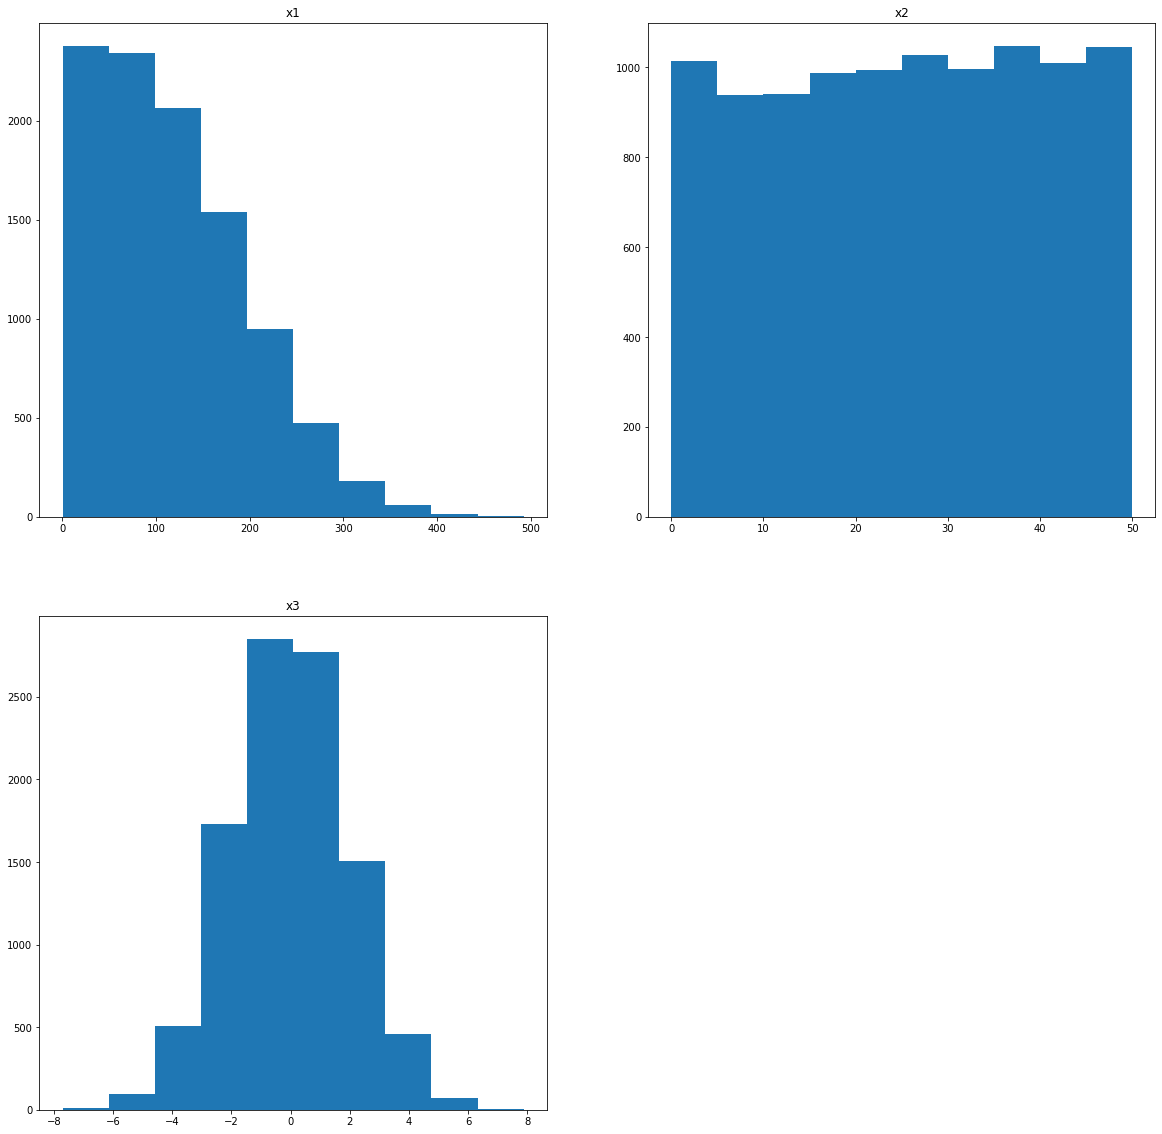

In [86]:
x = ["x1","x2","x3"]

plt.figure(figsize=(20,20))

for i in range(1,4):
    plt.subplot(2, 2, i)
    plt.hist(data=df,x=x[i-1])
    plt.title(x[i-1])


c) Clean the data using the following constraints (*)

- surf should be less than 4
- minutes should be less than 300
- cost should be larger than 0

In [91]:
# x1 : minutes
# x2 : sms
# x3 : surf

df = df[df["x1"] < 300 ]
df = df[df["x3"]<4]
df = df[df["y"]>0]
df

,y,x1,x2,x3,e
0,301.370624,149.671415,16.062759,-0.958919,16.942355
1,77.271831,86.173570,5.150960,-2.056136,-19.844007
2,458.575762,164.768854,3.590377,1.004004,52.042677
3,324.398566,252.302986,4.713799,-3.413725,-36.878049
4,101.047515,76.584663,29.143468,-0.535679,-64.909601
...,...,...,...,...,...
9995,552.783775,230.110206,34.146890,1.174038,-8.212007
9996,434.931560,99.834497,42.495572,2.401046,68.962471
9997,3.281712,29.468328,10.786175,-1.145467,-28.774695
9998,458.033187,149.576557,37.691313,1.013816,64.343596


# 5. Multiple linear regression (*)

  a) Perform a train|test split with 0.8 of the data for training. (*)




In [ ]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_train, y_train, 0.8) 

X_train_2.shape, X_test_2.shape, y_train_2.shape, y_test_2.shape

((224, 1), (56, 1), (224, 1), (56, 1))

  b) Use the normal equation to compute $β$


In [ ]:
X_train_2_matrix = np.asarray([np.ones(len(X_train_2)),X_train_2.flatten()]).T
b_2 = inv(X_train_2_matrix.T@X_train_2_matrix)@X_train_2_matrix.T@y_train_2

b_2

array([[30.34203049],
       [ 1.97476623]])


  c) Predict on the test data and compute MAE, MSE and RMSE. (*)


In [ ]:
predicted_y_2 = b_2[0]+X_test_2*b_2[1]

In [ ]:
m = len(X_test_2)

MAE = 1/m * np.sum(np.abs(y_test_2-predicted_y_2))
MSE = 1/m * np.sum((y_test_2-predicted_y_2)**2)
RMSE = np.sqrt(MSE)

MAE, MSE, RMSE

(37.48878299137365, 2179.0652155855328, 46.68045860513297)


  d) Now repeat 4a), 4c), 5a), 5b) using 10, 100, 1000, 10000, 100000, 1000000 samples, and calculate RMSE for each of these simulations. Plot the RMSE against sample size. (**)


In [113]:
sample_sizes = [10,100,1000,10000,100000,1000000]
RMSE_list = []


for s_z in sample_sizes : 
    # create a dataframe 
    np.random.seed(42)

    X1 = np.abs(np.random.normal(100,100,(s_z,1)))
    X2 = np.random.uniform(0,50,(s_z,1))
    X3 = np.random.normal(0,2,(s_z,1))
    epsilon = np.random.normal(0,50,(s_z,1))

    y = 25 + 2*X1 + 0.5*X2 + 50*X3 + epsilon

    y = y.flatten()
    X1 = X1.flatten()
    X2 = X2.flatten()
    X3 = X3.flatten()
    epsilon = epsilon.flatten()

    df = pd.DataFrame({"y":y,"x1":X1,"x2":X2,"x3":X3,"e":epsilon})

    #clean the data : 
    df = df[df["x1"] < 300 ]
    df = df[df["x3"]<4]
    df = df[df["y"]>0]

    # perform a 0.8 train|test split 

    limit = int(len(df)*0.8)
    df_train , df_test = df[:limit] , df[limit:]

    # calculate beta hat 
    y_train = df_train["y"]
    X1_train = df_train["x1"]
    X2_train = df_train["x2"]
    X3_train = df_train["x3"]
    
    X_train_matrix = np.asarray([np.ones(len(X1_train)),X1_train,X2_train,X3_train]).T
    beta_hat = inv(X_train_matrix.T@X_train_matrix)@X_train_matrix.T@y_train 

    #predict y
    y_test = df_test["y"]
    X1_test = df_test["x1"]
    X2_test = df_test["x2"]
    X3_test = df_test["x3"]

    X_test_matrix = np.asarray([np.ones(len(X1_test)),X1_test,X2_test,X3_test]).T

    predicted_y = X_test_matrix@beta_hat

    # calculate the RMSE 

    m = len(df_test)
    MAE = 1/m * np.sum(np.abs(y_test-predicted_y))
    MSE = 1/m * np.sum((y_test-predicted_y)**2)
    RMSE = np.sqrt(MSE)

    RMSE_list.append(RMSE)



    
    
    

    

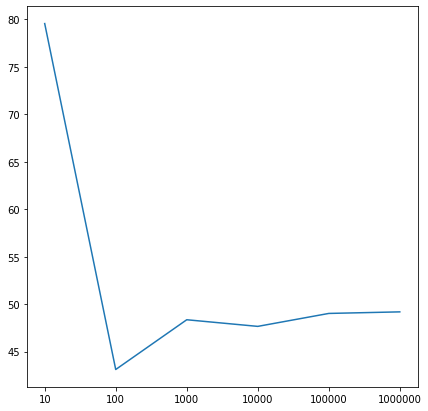

In [114]:
sample_sizes = [str(i) for i in sample_sizes]
plt.figure(figsize=(7,7))
plt.plot(sample_sizes,RMSE_list)